# Monte Carlo Simulations for Option Pricing

In [19]:
#importing the necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#function to estimate price of european call option using monte carlo simulation

In [27]:
def mc_optionpricing(S0, K, T, r, sigma, simul):
    dt = T / 365  #for 1 day
    sp = np.zeros(simul)
    
    for i in range(simul):
        price_path = [S0]
        for _ in range(365):
            dW = np.random.normal(0, np.sqrt(dt))
            dS = price_path[-1] * (r * dt + sigma * dW)
            price_path.append(price_path[-1] + dS)
        sp[i] = price_path[-1]
        
    # calculating the option price
    opt_payoff = np.maximum(sp - K, 0)
    opt_price = np.exp(-r * T) * np.mean(opt_payoff)
    
    return opt_price, price_path

In [28]:
#function to visualize possible price movements

In [74]:
def stock_paths_viz(S0, T, r, sigma, num_paths=10):
    dt = T / 365
    plt.figure(figsize=(10, 6))
    for _ in range(num_paths):
        price_path = [S0]
        for _ in range(365):
            dW = np.random.normal(0, np.sqrt(dt))
            dS = price_path[-1] * (r * dt + sigma * dW)
            price_path.append(price_path[-1] + dS)
        plt.plot(price_path)
    
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.title('Simulated Stock Price Paths')
    plt.grid()
    plt.show()

In [7]:
#implementation and result

Monte Carlo Option Pricing Simulator
Enter the current stock price: 100
Enter the strike price: 110
Enter the time to expiration (in years): 1
Enter the risk-free interest rate (as a decimal, e.g., 0.05 for 5%): 0.05
Enter the stock volatility (as a decimal, e.g., 0.2 for 20%): 0.2
Enter the number of Monte Carlo simulations: 10000

Estimated European Call Option Price: ₹6.06
Would you like to visualize some stock price paths? (yes/no): yes


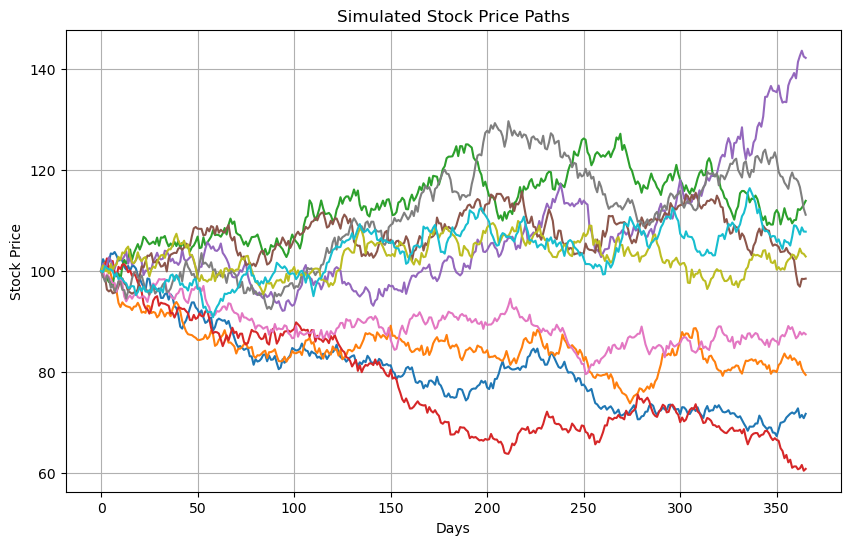

In [78]:
if __name__ == "__main__":
    print("Monte Carlo Option Pricing Simulator")
    
    S0 = float(input("Enter the current stock price: "))
    K = float(input("Enter the strike price: "))
    T = float(input("Enter the time to expiration (in years): "))
    r = float(input("Enter the risk-free interest rate (as a decimal, e.g., 0.05 for 5%): "))
    sigma = float(input("Enter the stock volatility (as a decimal, e.g., 0.2 for 20%): "))
    simul = int(input("Enter the number of Monte Carlo simulations: "))
    
    opt_price, _ = mc_optionpricing(S0, K, T, r, sigma, simul)
    
    print(f"\nEstimated European Call Option Price: ₹{opt_price:.2f}")
    
    plot_paths = input("Would you like to visualize some stock price paths? (yes/no): ").lower()
    if plot_paths == 'yes':
        stock_paths_viz(S0, T, r, sigma)